In [1]:
from plasma_classes import *
from plasma_utils import *
from matplotlib import pyplot as plt
from matplotlib import animation
from tqdm import tqdm

In [2]:
L = 1e-2
N_x = 200
N_p = 5000
h = L/N_x
tau = 1e-13

In [3]:
n0 = 1e17
n1 = n0*N_x/N_p
q = 1.60217e-19
m_e = 9.1093837e-31
m_i = 1.672e-27
epsilon = 8.85e-12

In [4]:
T_e = 11600*20
T_i = 600
k_b = 1.38e-23
v_t_e = math.sqrt(3*k_b*T_e/m_e)
vmin_e = -3*v_t_e
vmax_e = 3*v_t_e
v_t_i = math.sqrt(3*k_b*T_i/m_i)
vmin_i = -3*v_t_i
vmax_i = 3*v_t_i

In [5]:
r_d = math.sqrt(epsilon * k_b * T_e / (q * q * n0));

In [6]:
r_d

0.00010506222052218572

In [7]:
h

5e-05

In [8]:
ions = Particles(N_p, n1, q, m_i)
electrons = Particles(N_p, n1, -q, m_e)
nodes = Nodes(N_x)

In [9]:
left_wall = Wall(L/10/h, 0)
right_wall = Wall(9*L/10/h, 0)

In [10]:
set_homogeneous(electrons, left_wall.x*h, right_wall.x*h)

In [11]:
set_homogeneous(ions, left_wall.x*h, right_wall.x*h)

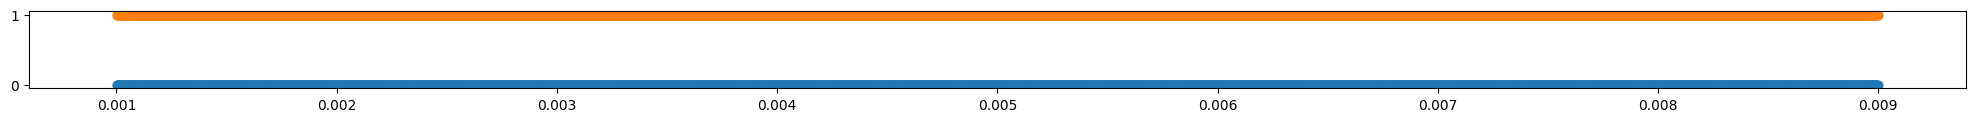

In [12]:
fig, ax = plt.subplots(1, 1)
ax.scatter(electrons.x, np.zeros(electrons.x.shape))
ax.scatter(ions.x, np.ones(ions.x.shape))
fig.set_size_inches((25, 1))


In [13]:
set_distr(electrons, Maxwell(T_e, k_b, m_e), vmin_e, vmax_e, 1000)
set_distr(ions, Maxwell(T_i, k_b, m_i), vmin_i, vmax_i, 1000)

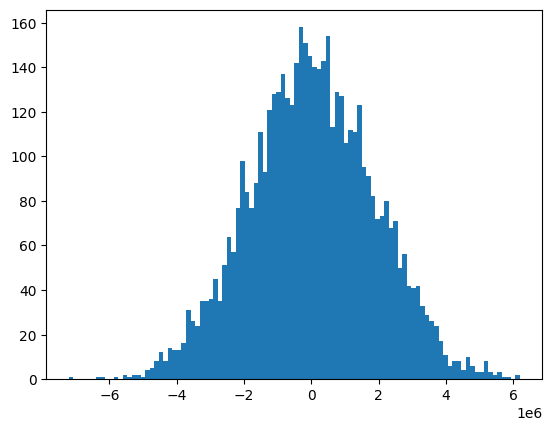

In [14]:
plt.hist(electrons.v, bins = 100)
%matplotlib inline

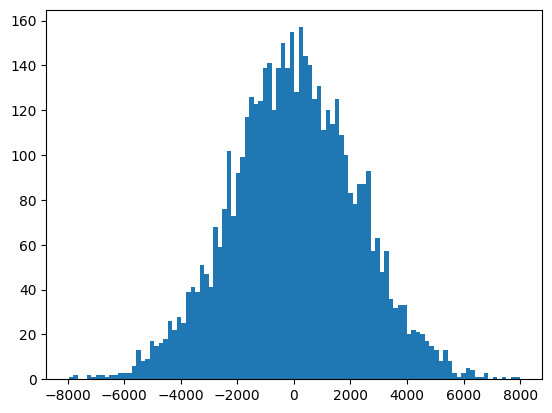

In [15]:
plt.hist(ions.v, bins = 100)
%matplotlib inline

In [16]:
electrons.normalise(h, tau)
ions.normalise(h, tau)

In [17]:
get_rho(nodes, electrons)
get_rho(nodes, ions)

In [18]:
calc_fields(nodes, h, epsilon)

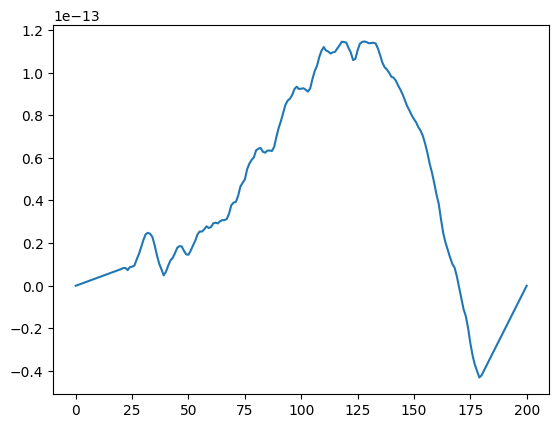

In [19]:
plt.plot(nodes.phi)

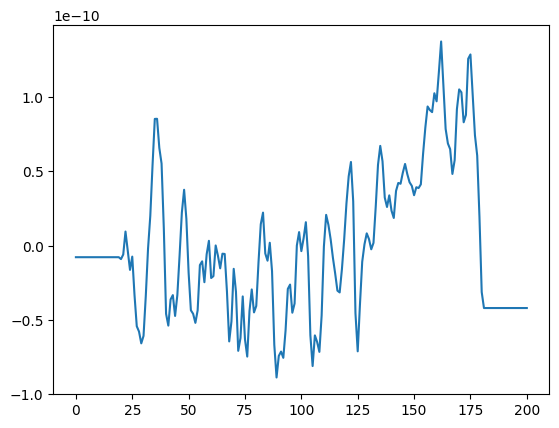

In [20]:
plt.plot(nodes.E)

In [21]:
accel(electrons, nodes, L, h, tau, zerostep=True)
accel(ions, nodes, L, h, tau, zerostep=True)

In [22]:
electron_distrs = []
ion_distrs = []

In [23]:
phi_over_time = []
E_over_time = []

In [24]:
n = 10000

In [25]:
for t in tqdm(range(n)):
    try:
        move(electrons, nodes, consistency=True)
        move(ions, nodes, consistency=True)
    except Exception:
        print("number of iteration: ", t)
        break

    nodes.rho *= 0
    account_walls(nodes, electrons, left_wall, right_wall)
    account_walls(nodes, ions, left_wall, right_wall)
    get_rho(nodes, electrons)
    get_rho(nodes, ions)
    
    calc_fields(nodes, h, epsilon, periodic=True)
    phi_over_time.append(nodes.phi.copy())
    E_over_time.append(nodes.E.copy())
    accel(electrons, nodes, L, h, tau)
    accel(ions, nodes, L, h, tau)
    
    electrons.denormalise(h, tau)
    ions.denormalise(h, tau)
    electron_distrs.append(electrons.v.copy())
    ion_distrs.append(ions.v.copy())
    electrons.normalise(h, tau)
    ions.normalise(h, tau)
    

100%|██████████| 10000/10000 [02:12<00:00, 75.31it/s]


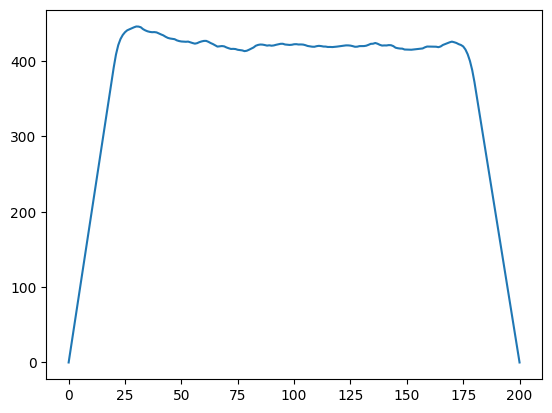

In [28]:
plt.plot(phi_over_time[-1])

In [55]:
electrons.n_macro

4770

In [56]:
ions.n_macro

4987

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


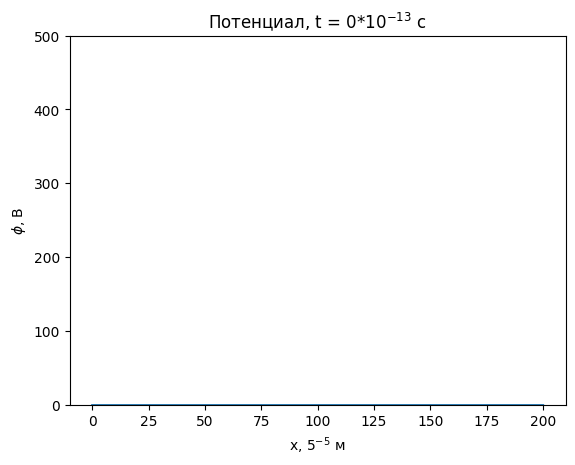

In [201]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        line = ax.plot(phi_over_time[i*10])
        ax.set_title("Потенциал, t = " + str(i*10)+ r"$*10^{-13}$ c")
        ax.set_ylim(0, 500)
        ax.set_ylabel(r"$\phi$, В")
        ax.set_xlabel(r"x, $5^{-5}$ м")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/phi_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


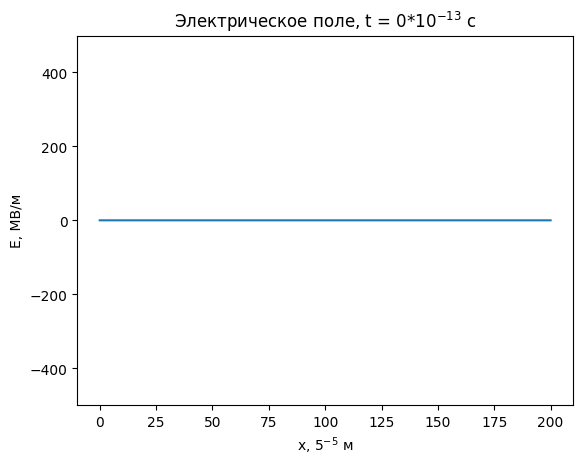

In [202]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        line = ax.plot(E_over_time[i*10]/1000)
        ax.set_title("Электрическое поле, t = " + str(i*10)+ r"$*10^{-13}$ c")
        ax.set_ylim(-500, 500)
        ax.set_ylabel(r"E, МВ/м")
        ax.set_xlabel(r"x, $5^{-5}$ м")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/E_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


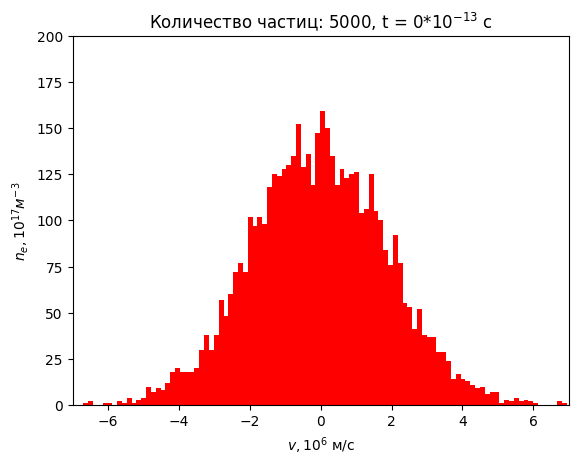

In [205]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        line = ax.hist(electron_distrs[0]/1e6, bins=100, color="b")
        ax.hist(electron_distrs[i*10]/1e6, bins=100, color="r")
        ax.set_title("Количество частиц: " + str(len(electron_distrs[i*10])) + 
                     ", t = " + str(i*10)+ r"$*10^{-13}$ c")
        ax.set_ylim(0,200)
        ax.set_xlim(-7, 7)
        ax.set_ylabel(r"$n_e, 10^{17} м^{-3}$")
        ax.set_xlabel(r"$v, 10^{6}$ м/c")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/electron_distrs_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")

MovieWriter imagemagick unavailable; using Pillow instead.


list index out of range
done!


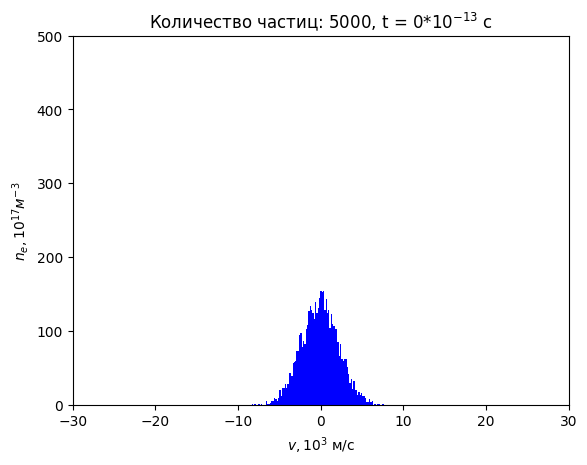

In [204]:
try:
    fig, ax = plt.subplots()

    #  Создаем функцию, генерирующую картинки
    #  для последующей "склейки":
    def animate(i):
        ax.clear()
        line = ax.hist(ion_distrs[i*10]/1000, bins=100, color="r")
        ax.hist(ion_distrs[0]/1000, bins=100, color="b")
        ax.set_title("Количество частиц: " + str(len(ion_distrs[i*10])) + 
                     ", t = " + str(i*10)+ r"$*10^{-13}$ c")
        ax.set_ylim(0, 500)
        ax.set_xlim(-30, 30)
        ax.set_ylabel(r"$n_e, 10^{17} м^{-3}$")
        ax.set_xlabel(r"$v, 10^{3}$ м/c")
        return line

    #  Создаем объект анимации:
    sin_animation = animation.FuncAnimation(fig, 
                                        animate, 
                                        frames=range(n),
                                        interval = 5,
                                        repeat = False)

    #  Сохраняем анимацию в виде gif файла:
    sin_animation.save('results/ion_distrs_over_time.gif',
                    writer='imagemagick', 
                    fps=30)
except Exception as e:
    print(e)
    print("done!")